In class Activity

28 december

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

Loading dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#dataset is about smokers and charges they paid

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
 #there is none missing values
#datatype of columns are int, object and float
 #we need to convert datatypes of sex, smoker and region using one hot encoding method for further analysis

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#from description it can be seen there is a difference between minimum and maximum values of each column
#there are outliers present in charges and bmi column because of the huge difference in maximum and 75% of values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
#one duplicated value found so drop it

In [12]:
df = df.drop_duplicates()

One Hot Encoding Technique

In [13]:
#converting columns sex, smoker and region using one hot encoding

In [14]:
# One-hot encoding 
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
region_mapping = {'southeast': 10, 'southwest': 11, 'northeast': 20, 'northwest': 21}
df['region'] = df['region'].map(region_mapping)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,11,16884.92400
1,18,1,33.770,1,0,10,1725.55230
2,28,1,33.000,3,0,10,4449.46200
3,33,1,22.705,0,0,21,21984.47061
4,32,1,28.880,0,0,21,3866.85520


Normalizing data

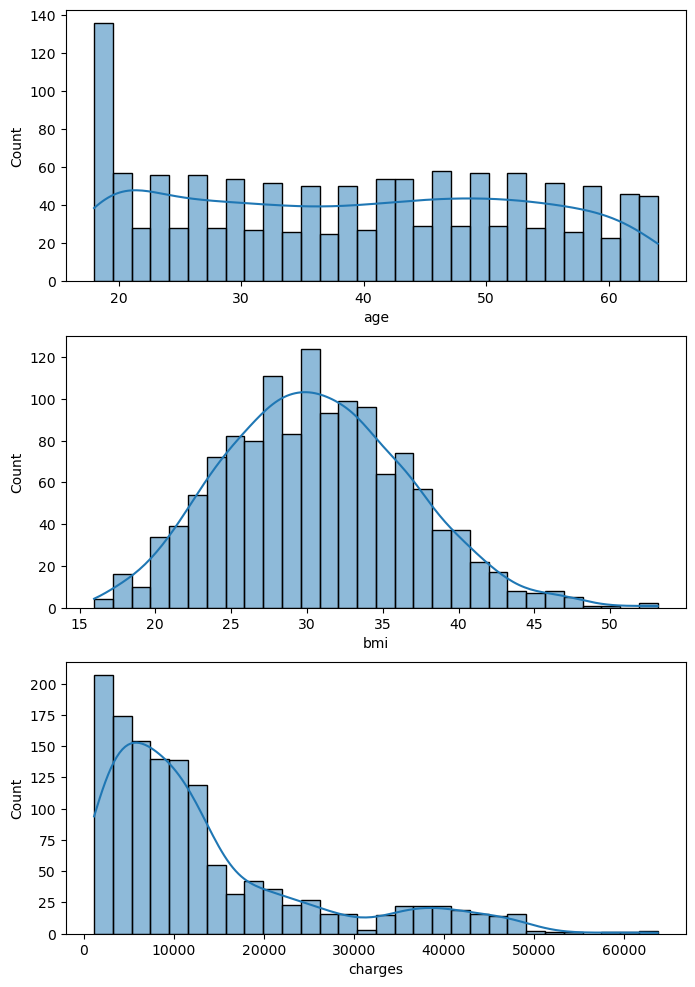

In [15]:
#Normalizing and standardizing 'bmi' and 'charges' columns
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

df[['bmi_norm', 'charges_norm']] = scaler_norm.fit_transform(df[['bmi', 'charges']])
df[['bmi_std', 'charges_std']] = scaler_std.fit_transform(df[['bmi', 'charges']])

#Analyzing the distribution of key variables: age, bmi, and charges
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

#Plotting the histogram for age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
#Plotting the histogram for bmi
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1])
#Plotting the histogram for charges
sns.histplot(df['charges'], bins=30, kde=True, ax=axes[2])

#Showing the figure
plt.show()

In [16]:
#rescaled data by the minimum and maximum values lieing between 0 and 1
#resulting in reducing effect of outliers making data more uniform
#standardized data to get zero mean and unit variance 

In [17]:
#age is not showing fairly uniformed distribution
#bmi is showing roughly normal distribution
#charges is positively skewed indicating outliers on right side  Right-skewed
#with most individuals having lower charges and a few with very high charges.

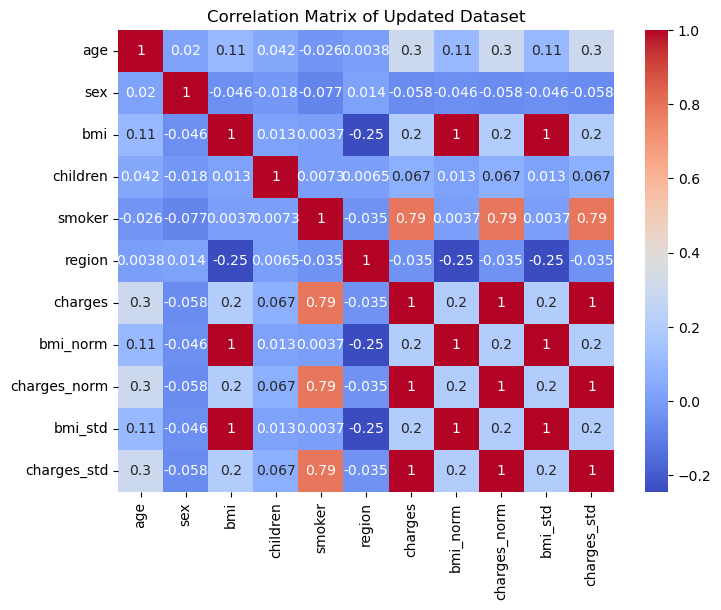

In [18]:
corr_matrix_updated = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Updated Dataset')
plt.show()

Dropping Columns

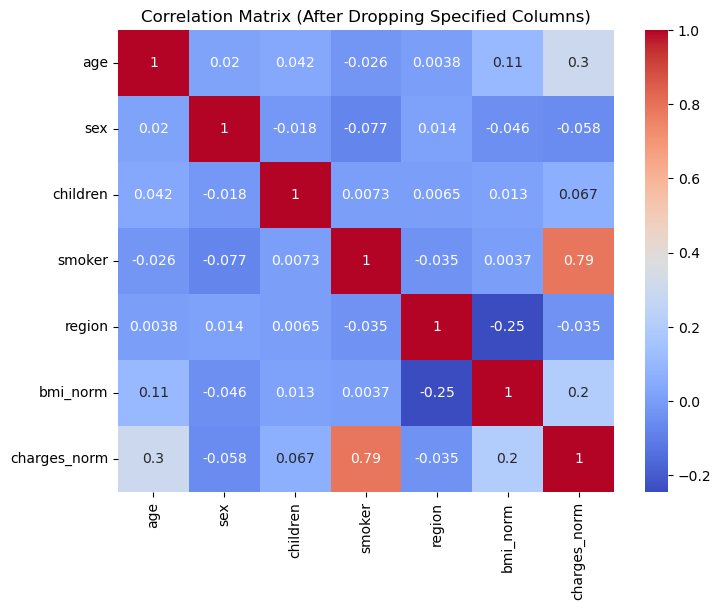

In [20]:
# Dropping specified columns
columns_to_drop = ['bmi', 'charges', 'bmi_std', 'charges_std']
df_dropped = df.drop(columns=columns_to_drop)

# Computing and displaying the new correlation matrix
correlation_matrix_dropped = df_dropped.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_dropped, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (After Dropping Specified Columns)')
plt.show()


In [ ]:
#it can be seen clearly there is a strong correlation between smoker and charges
#others features shows no as such correlation

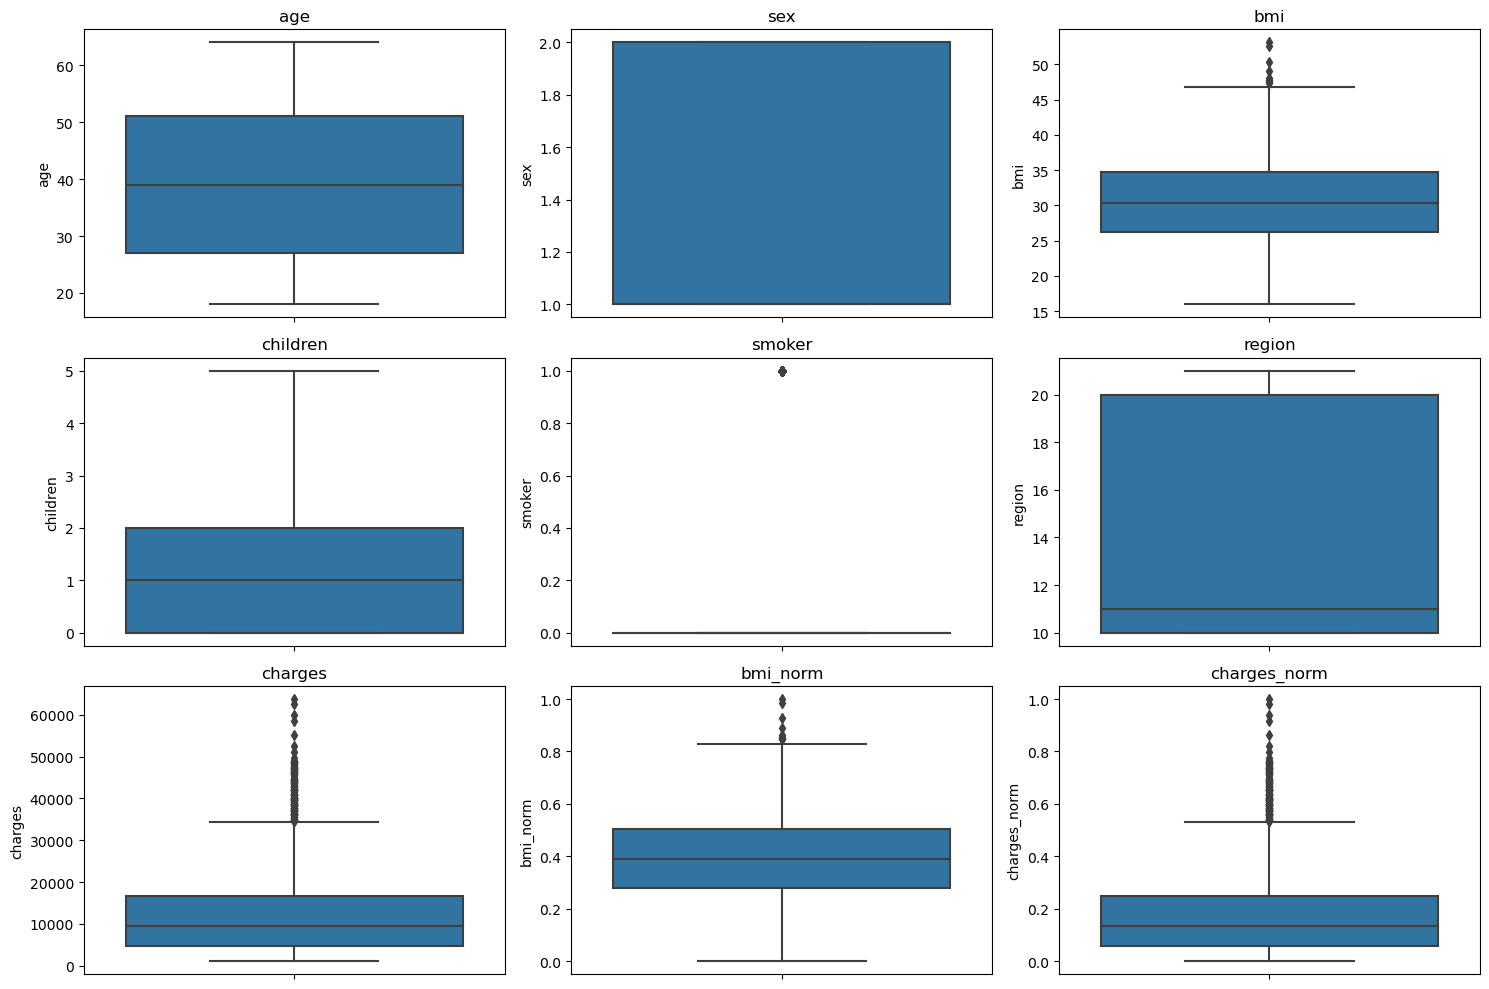

In [21]:
features_updated = df.columns[:9]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_updated):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [22]:
#we can observe charges and bmi displaying some outliers
#categorical features encoded as numerical values (like 'sex', 'smoker', and 'region') show distinct groupings, as expected.

# Linear Regression Model

Splitting data for training amd testing

In [23]:
#Splitting the dataset into training and testing sets
X = df.drop('charges_norm', axis=1)
y = df['charges_norm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# c - Evaluating model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(1.0, 5.883129098465723e-33)

In [24]:
#r squared value is 1
#and mean square value is 5.8
# r squared value of 1 means model perfectly fits the data and there is no error
#mean squared value of 5.8 means average squared error of your model is 5.8

 Checking significance of the coefficients to assess the validity and reliability

In [25]:
#Interpreting the coefficients of the linear regression model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

#Evaluating the impact of different features on medical charges
coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
6,charges,1.596206e-05
9,charges_std,1.318543e-09
3,children,1.816526e-18
0,age,9.248715e-19
5,region,6.843928e-19
7,bmi_norm,-3.263218e-20
8,bmi_std,-1.989016e-19
2,bmi,-1.212939e-18
4,smoker,-3.008230e-17
1,sex,-7.559898e-17


Interpretation of coefficients

In [26]:
#charges has highest positive coefficient it has the strongest positive relationship with the outcome variable
#highest negative coefficient is sex it has the strongest negative relationship with the outcome variable
#lowest absolute coefficients are bmi_norm and bmi_std, which means that they have the weakest relationship with the outcome variable

Evaluation impact on medical charges

In [29]:
#smoker has the most significant impact on charges
#bmi also has a considerable impact
#Age and the number of children moderately influence medical charges
#sex and region has relatively low impact on charges

# Ridge model and Lasso model

In [27]:
from sklearn.linear_model import Ridge, Lasso

# Implementing Ridge and Lasso regression models
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

# Training Ridge model
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Training Lasso model
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Results
r2_ridge, mse_ridge, r2_lasso, mse_lasso

(1.0, 8.596172912315826e-24, 0.9999997863263258, 9.315879627883618e-09)

In [28]:
#r squared value for ridge model is same as linear model but mean squared value is comparatively high
#r squared value for lasso model is almost same with both models but mean squared value is more higher than other two